In [1]:
import networkx as nx
import matplotlib.pylab as plt
import numpy

In [2]:
datafile = open("data.txt", "r", encoding="utf-8")
graph = nx.DiGraph()

# Create network where nodes=paperID and endge if paper A cites paper B
process_paper = 0
print("Creating graph..")
for line in datafile.readlines():
    if (line.startswith("#index")):
        process_paper = int(line.split("index")[1])
        graph.add_node(process_paper)
    elif (line.startswith("#%")):
        edge_to = int(line.split("%")[1])
        graph.add_edge(process_paper, edge_to)
        # debug
        #print(list(graph.edges()))
        #nx.draw_networkx(graph)
        #plt.show()

print("Graph generation done\n\n")

Creating graph..
Graph generation done




In [3]:
#--1--

print("Number of edges: ", graph.number_of_edges())
print("Number of nodes: ", graph.number_of_nodes())
number_of_nodes = graph.number_of_nodes()
try:
    print("Diameter: " + str(nx.diameter(graph)))  # Graph not strongly connected
except Exception as e:
    print(e)
print("Avg Clustering coefficient: ", nx.average_clustering(graph))

num_strongly_connected = 0
num_weakly_connected = 0
sg_diams = []
largest = graph
for c in sorted(nx.strongly_connected_components(graph), key=len, reverse=True):
    num_strongly_connected += 1
    sg = graph.subgraph(c).copy()
    sg_diams.append(nx.diameter(sg))
    #print(sg)
    
print("max Diam without conversion to undirected", max(sg_diams))
for c in sorted(nx.weakly_connected_components(graph), key=len, reverse=True):
    num_weakly_connected += 1
    
print("Number of (strongly) connected components: ", num_strongly_connected)
print("Number of (weakly) connected components: ", num_weakly_connected)
degree_centrality = nx.degree_centrality(graph)
temptot = 0
for item in degree_centrality:
    temptot += degree_centrality[item]
print("Avg degree centrality: ", temptot/len(degree_centrality))

Number of edges:  632751
Number of nodes:  629814
Found infinite path length because the digraph is not strongly connected
Avg Clustering coefficient:  0.014596524203392774
max Diam without conversion to undirected 5
Number of (strongly) connected components:  628549
Number of (weakly) connected components:  416924
Avg degree centrality:  3.190354221130881e-06


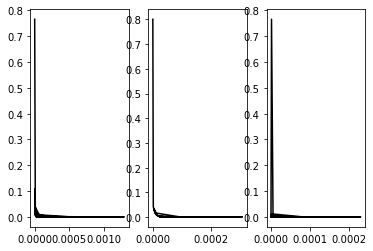

In [4]:
#--2--

degreefile = open("degreefile.txt", "w")
indegreecent = nx.algorithms.centrality.in_degree_centrality(graph)
outdegreecent = nx.algorithms.centrality.out_degree_centrality(graph)
pagerankcent = nx.pagerank(graph)

# Save #2 stuff to file
degreefile.writelines("IN DEGREE:\n")
for item in indegreecent:
    degreefile.writelines("{}: {}\n".format(item, indegreecent[item]))
degreefile.writelines("\n\nOUT DEGREE:\n")
for item in outdegreecent:
    degreefile.writelines("{}: {}\n".format(item, outdegreecent[item]))
degreefile.writelines("\n\nPAGERANK:\n")
for item in pagerankcent:
    degreefile.writelines("{}: {}\n".format(item, pagerankcent[item]))

    
# Copied from Janne's code (but plots in separate graphs) -->
# function to get distributions
def centrality_distributions(dic):
    # init x and y
    x = [0]*1
    y = [0]*1
    for key in dic:
        if dic[key] not in x:
            x.append(dic[key])
            y.append(0)
        y[x.index(dic[key])] += 1
    y = [y_item / number_of_nodes for y_item in y]
    return x, y

# in degree centrality distribution
f, (ax1, ax2, ax3) = plt.subplots(1,3)
x_id, y_id = centrality_distributions(indegreecent)
ax1.plot(x_id, y_id, color='black')

# out degree centrality distribution
x_od, y_od = centrality_distributions(outdegreecent)
ax2.plot(x_od, y_od, color='black')

# pagerank degree centrality distribution
x_pr, y_pr = centrality_distributions(pagerankcent)
ax3.plot(x_pr, y_pr, color='black')

plt.show()

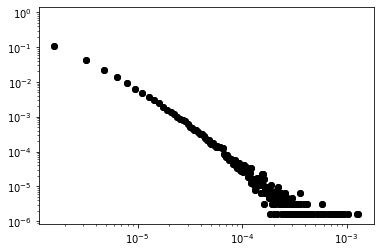

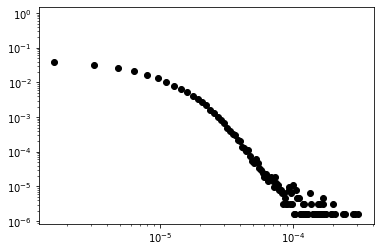

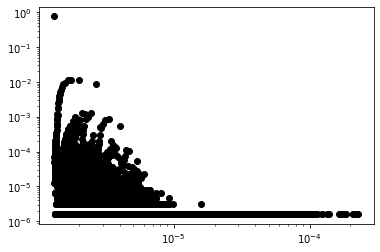

In [5]:
#--3--

plt.yscale("log")
plt.xscale("log")

plt.plot(x_id, y_id,'o', color='black')
#x_id_log = [log(val,10) for val in x_id]
#y_id_log = [log(val,10) for val in y_id]
plt.plot(x_id, y_id,'o', color='black')
#plt.plot(x_id_log, y_id_log,'o', color='black')
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.show()

plt.yscale("log")
plt.xscale("log")

#x_od_log = [log(val,10) for val in x_od]
#y_od_log = [log(val,10) for val in y_od]
plt.plot(x_od, y_od,'o', color='black')
#plt.plot(x_od_log, y_od_log,'o', color='black')
plt.show()

plt.yscale("log")
plt.xscale("log")

#x_pr_log = [log(val,10) for val in x_pr]
#y_pr_log = [log(val,10) for val in y_pr]
plt.plot(x_pr, y_pr,'o', color='black')
#plt.plot(x_pr_log, y_pr_log,'o', color='black')
plt.show()

In [6]:
#--5--Preparation
import json

# Create dict of paper-publishvenue
dataf = open("data.txt", "r", encoding="utf-8")
publishdict = {}
for line in dataf.readlines():
    if line.startswith("#c") or line.startswith("#index"):
        try:
            publishplace = line.split("#c")[1].strip("\n")
        except Exception:
            paper = line.split("#index")[1].strip("\n")
            publishdict[paper] = publishplace
dataf.close()

teht5 = open("teht5.txt", "w")
subnum = 0
def t_5(subgraph):
    global subnum
    venues = {}
    for node in subgraph.nodes():
        try:
            venue = publishdict[str(node)]
        except Exception:
            venue = ""

        try:
            num_venue = int(venues[venue])
        except Exception:
            num_venue = 0

        venues[venue] = str(num_venue + 1)
    
    teht5.writelines("subgraph: {}\n".format(subnum))
    teht5.write(json.dumps(venues))
    teht5.writelines("\n\n")
    subnum += 1

In [7]:
#--4--PREPARATION
import statistics

nondirectedgraph = nx.Graph() #label propagation implementation only works on non directed graphs
process_paper = 0
print("Creating nondirected graph..")
datafile.close()
datafile = open("data.txt", "r", encoding="utf-8")

for line in datafile.readlines():
    if (line.startswith("#index")):
        process_paper = int(line.split("index")[1])
        nondirectedgraph.add_node(process_paper)
    elif (line.startswith("#%")):
        edge_to = int(line.split("%")[1])
        nondirectedgraph.add_edge(process_paper, edge_to)


print("Graph generation done\n\n")
print("Getting communities..")
communities = nx.algorithms.community.label_propagation_communities(nondirectedgraph)
print("Getting communities done!")

subgraphfile = open("subgraphs.txt", "w")
i = 0
print("Saving community info to file")
for community in communities:
    subgraph = nondirectedgraph.subgraph(community).copy()

    t_5(subgraph) #preparation for teht. 5

    #print("\n\nsubgraph: {}\n".format(i))
    subgraphfile.writelines("\n\nsubgraph: {}".format(i))
    try:
        #print("Number of edges: ", subgraph.number_of_edges())
        subgraphfile.writelines(" Number of edges: {}".format(subgraph.number_of_edges()))
        #print("Number of nodes: ", subgraph.number_of_nodes())
        subgraphfile.writelines(" Number of nodes: {}".format(subgraph.number_of_nodes()))
        #print("Avg Clustering coefficient: ", nx.average_clustering(subgraph))
        subgraphfile.writelines(" Avg Clustering coefficient: {}".format(nx.average_clustering(subgraph)))
        #print("Diameter: " + str(nx.diameter(subgraph)))  # Will fail if not strongly connected
        subgraphfile.writelines(" Diameter: " + str(nx.diameter(subgraph)))
    except Exception as e:
        #print("Error: ", str(e))
        subgraphfile.writelines("Error: {}".format(str(e)))
    subgraphfile.writelines("\n")
    i += 1
subgraphfile.close()
print("Preparation done\n")

#--4--ANALYSIS
print("Start analysis\n")
file = open("subgraphs.txt")
dc = {"graphs": [], "edges": [], "nodes": [], "clust": [], "diam": []}
num_single_node = 0
for line in file.readlines():
    sp = line.strip("\n").split(" ")
    if len(sp) > 1:
        subgraph = sp[1]
        edges = sp[5]
        nodes = sp[9]
        avg_clustering = sp[13]
        diameter = sp[15]
        dc["graphs"].append(float(subgraph))
        dc["edges"].append(float(edges))
        if edges == "0":
            num_single_node += 1
        dc["nodes"].append(float(nodes))
        dc["clust"].append(float(avg_clustering.strip("Error:")))
        try:
            dc["diam"].append(float(diameter))
        except Exception:
            pass
print(num_single_node)
print("avg nodes: " + str(sum(dc["nodes"])/len(dc["nodes"])))
print("median nodes: "+ str(statistics.median(dc["nodes"])))
print("variance nodes: " + str(statistics.variance(dc["nodes"])))
print("stantard deviation nodes: " + str(statistics.stdev(dc["nodes"])))
print("\n\n")
print("avg edges: " + str(sum(dc["edges"])/len(dc["edges"])))
print("median edges: "+ str(statistics.median(dc["edges"])))
print("variance edges: " + str(statistics.variance(dc["edges"])))
print("stantard deviation edges: " + str(statistics.stdev(dc["edges"])))
print("\n\n")
print("avg clust: " + str(sum(dc["clust"])/len(dc["clust"])))
print("median clust: "+ str(statistics.median(dc["clust"])))
print("variance clust: " + str(statistics.variance(dc["clust"])))
print("stantard deviation clust: " + str(statistics.stdev(dc["clust"])))
print("\n\n")
print("avg diam: " + str(sum(dc["diam"])/len(dc["diam"])))
print("median diam: "+ str(statistics.median(dc["diam"])))
print("variance diam: " + str(statistics.variance(dc["diam"])))
print("stantard deviation diam: " + str(statistics.stdev(dc["diam"])))

Creating nondirected graph..
Graph generation done


Getting communities..
Getting communities done!
Saving community info to file
Preparation done

Start analysis

412479
avg nodes: 1.4165697641726926
mediaani nodes: 1.0
variance nodes: 426.04114342324254
stantard deviation: 20.64076411917065



avg edges: 0.8111559699058715
mediaani edges: 0.0
variance edges: 4093.896207560862
stantard deviation edges: 63.983562010573166



avg clust: 0.003883411941403397
mediaani clust: 0.0
variance clust: 0.0023244931582678085
stantard deviation clust: 0.0482129978145708



avg diam: 0.1300803495690014
mediaani diam: 0.0
variance diam: 0.30202999520897883
stantard deviation diam: 0.5495725568193692


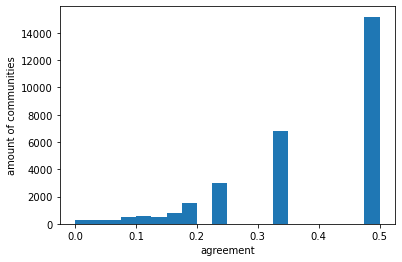

In [8]:
#--5--Analysis

def do_analysis_5():
    teht5file = open("teht5.txt", "r")
    community = 0
    for line in teht5file.readlines():
        if line.startswith("{"):
            venuedict = json.loads(line)
            analysedict(venuedict, community)
        if line.startswith("subgraph"):
            community += 1
    draw_histogram()

ylistall = []
ylist_not1 = []
def analysedict(venues, community):
    agreement = 1 / len(venues)
    ylistall.append(agreement)
    if len(venues) > 1:
        ylist_not1.append(agreement)

def draw_histogram():
    print("")
    #plt.hist(ylistall)
    plt.xlabel("agreement")
    plt.ylabel("amount of communities")
    plt.hist(ylist_not1, bins=20)
    plt.show()
    
do_analysis_5()

In [9]:
#--6--
datafile = open("data.txt", "r", encoding="utf-8")
graph = nx.Graph()

# Generate graph
print("Generating graph..")
for line in datafile.readlines():
    if (line.startswith("#@")):

        # For evey author line:
        splitted = line.strip("\n").split(",") #strip \n + split ,
        splitted[0] = splitted[0].strip("#@")
        
        donepairs = []
        donelist = []
        for j in range(len(splitted)):
            
            #for each author in line
            person1 = splitted[j].strip("\n")
            donelist.append(person1)
            if len(splitted) == 1:
                graph.add_node(person1)
            
            else:
                for i in range(len(splitted)):
                    # for each author in line
                    person2 = splitted[i].strip("\n")
                    alreadydone = False
                    # Loop through all done pairs and if item contains both names -> skip
                    for item in donepairs:
                        if person1 in item and person2 in item:
                            alreadydone = True

                    if not alreadydone:
                        # Filter away some random "names"
                        # Line "Chuck Barritt,Alderman F. Lee, Jr." => ["Chuck Barritt", "Alderman F. Lee", " Jr."]
                        # so skip if person1 and person 2 the same or startswith space
                        if person1 != person2 and not person1.startswith(" ") and not person2.startswith(" ") and person2 not in donelist:
                            # If connection already get weighth
                            weight = graph.get_edge_data(person1, person2, default=0)

                            if weight != 0:
                                #update weiught
                                curr_weight = int(weight["weight"])
                                graph[person1][person2]["weight"] = curr_weight + 1
                                #data = graph.get_edge_data(person1, person2)
                            else:
                                # add new with connection weight 1
                                graph.add_edge(person1, person2, weight=1)
                            donepairs.append(person1 + person2) # Add item containing both names to donepairs


print("Number of edges: ", graph.number_of_edges())
print("Number of nodes: ", graph.number_of_nodes())
try:
    print("Diameter: " + str(nx.diameter(graph)))
except Exception as e:
    print("Error: " + str(e))
print("Avg Clustering coefficient: ", nx.average_clustering(graph))
num_connected = 0
conn_diam = []
maxnumnodes = 0
conn_ = graph 
for c in sorted(nx.connected_components(graph), key=len, reverse=True):
    num_connected += 1
    
    #For getting max diameter
    try:
        conn = graph.subgraph(c).copy()
        if conn.number_of_nodes() > maxnumnodes:
            maxnumnodes = conn.number_of_nodes()
            conn_ = conn
            print("maxnodes: ", maxnumnodes)
    except Exception:
        pass

#print("max diam", nx.diameter(conn_)) #WILL TAKE FOREVER
print("Number of connected components: ", num_connected)

degree_centrality = nx.degree_centrality(graph)
temptot = 0
for item in degree_centrality:
    temptot += degree_centrality[item]
print("Avg degree centrality: ", temptot/len(degree_centrality))


Generating graph..
Number of edges:  1127141
Number of nodes:  594194
Error: Found infinite path length because the graph is not connected
Avg Clustering coefficient:  0.5076932574428971
maxnodes:  338465
Number of connected components:  143709
Avg degree centrality:  6.384875745270598e-06


Max num of connections is 316 for Wei Wang
Getting erdos numbers..
maximum Erdos number: inf
minimum Erdos number: 1
median Erdos (ingnoring infinities) is 5.0
Histogram ignoring infinite paths


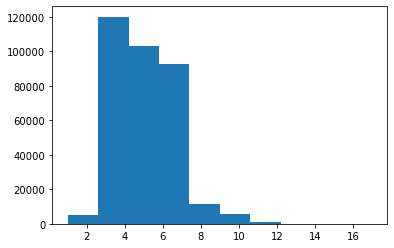

In [10]:
#--7--

max_num_connections = 0
max_connection_author = ""
for node in graph.nodes():
    connections = sum(1 for _ in graph.neighbors(node))
    if connections > max_num_connections:
        max_num_connections = connections
        max_connection_author = node

print("Max num of connections is {} for {}".format(max_num_connections, max_connection_author))

erdoses = {}
print("Getting erdos numbers..")
for node in graph.nodes():
    if node != max_connection_author:
        try:
            distance = len(nx.shortest_path(graph, max_connection_author, node)) - 1
        except Exception: # No path
            distance = float("inf")
        erdoses[node] = distance

print("maximum Erdos number: {}".format(max(erdoses.values())))
print("minimum Erdos number: {}".format(min(erdoses.values())))

# Get median
noninfvalues = []
for value in erdoses.values():
    if value != float("inf"):
        noninfvalues.append(value)
print("median Erdos (ingnoring infinities) is {}".format(statistics.median(noninfvalues)))

erdosfile = open("erdos.txt", "w")
erdosfile.write(json.dumps(erdoses))
erdosfile.close()
datafile.close()

print("Histogram ignoring infinite paths")
plt.hist(noninfvalues)
plt.show()

In [11]:
#--8-- preparation
import math

file8 = open("8output.txt", "w", encoding="utf-8")
total_process = 1
lista = list(graph.nodes)
for item in lista:
    #print(item, total_process)
    n_neighbors = list(graph.neighbors(item))
    for n in n_neighbors:
        data = graph.get_edge_data(item, n, default=0)
        if data != 0:
            collabtimes = data["weight"]
            Fi = len(n_neighbors)
            try:
                res = 1 - math.log((collabtimes / Fi), 10)
            except Exception:    
                res = 0
            file8.writelines(item + ", " + n + ": " + str(res) + "\n")
        else:
            res = 0
    total_process += 1

#--8-- Analysis
file8 = open("8output.txt", "r", encoding="utf-8")

d = {}
for line in file8.readlines():
    sp = line.strip("\n").split(":")
    d[sp[0]] = float(sp[-1].strip(" "))

asd = sorted(d, key=d.get, reverse=True)[:10]
print(asd)

for a in asd:
    print(a, d[a])

['Wei Wang, Guopeng Zhang', 'Wei Wang, Hailin Zhang', 'Wei Wang, Liqiang Zhao', 'Wei Wang, Li Cong', 'Wei Wang, Hang Guo', 'Wei Wang, Jidong Chen', 'Wei Wang, Peng Zhang', 'Wei Wang, Runsheng Wang', 'Wei Wang, Weidong Yang', 'Wei Wang, Qingming Wang']
Wei Wang, Guopeng Zhang 3.4996870826184034
Wei Wang, Hailin Zhang 3.4996870826184034
Wei Wang, Liqiang Zhao 3.4996870826184034
Wei Wang, Li Cong 3.4996870826184034
Wei Wang, Hang Guo 3.4996870826184034
Wei Wang, Jidong Chen 3.4996870826184034
Wei Wang, Peng Zhang 3.4996870826184034
Wei Wang, Runsheng Wang 3.4996870826184034
Wei Wang, Weidong Yang 3.4996870826184034
Wei Wang, Qingming Wang 3.4996870826184034


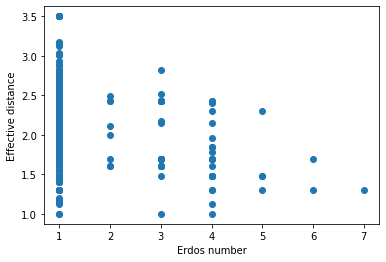

In [12]:
#--9--
import re

erdosfile = open("erdos.txt", "r", encoding="utf-8")
effectdist = open("8output.txt", "r", encoding="utf-8")

weis_neighbors = []
effectivdict = {}
for line in effectdist.readlines():
    if "Wei Wang" in line:
        spr = line.strip("\n")
        sp = re.split(",|:", spr)
        
        for i in range(len(sp)):
            sp[i] = sp[i].strip(" ")

        if "Wei Wang" in sp[0]:
            weis_neighbors.append(sp[1])
            effectivdict[sp[1]] = float(sp[2])
        elif "Wei Wang" in sp[1]:
            weis_neighbors.append(sp[0])
            effectivdict[sp[0]] = float(sp[2])
        

weis_neighbors = list(dict.fromkeys(weis_neighbors)) #strip duplicates
effectdist.close()

erdoses = json.loads(erdosfile.readline())
x = []
y = []
for neighbor in weis_neighbors:
    try:
        erdos = erdoses[neighbor]
        effe = effectivdict[neighbor]
        x.append(erdos)
        y.append(effe)
    except Exception:
        pass

plt.scatter(x=x, y=y)
plt.xlabel("Erdos number")
plt.ylabel("Effective distance")
plt.show()